In [1]:
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, GRU, RNN
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data into a dataframe
data = np.load('polution_dataSet.npy')

In [3]:
'''
IN this part data for test, validation and train is preperd.
'''
# data format is : pollution  ,dew  ,temp  , press ,wnd_dir , wnd_spd , snow , rain
# total data =43000
# per day and week = 43000/24*7 =250

SAMPLE_DISTANCE = 24*7    # if 1 sample per hour, if 24 per day, if 24*7 per week
TRAIN_SIZE = 120
VAL_SIZE = 50
TEST_SIZE = 30
TIMESTEPS = 8             # timesteps used for a single prediction (here each timestep is a week)
HOUR = 2                  # which hour of day ? (0-23) (not so important)

In [4]:
x_train = []
y_train = []
for i in range(TRAIN_SIZE):
    x_train.append(np.array(data[i*SAMPLE_DISTANCE+HOUR:i*SAMPLE_DISTANCE+TIMESTEPS+HOUR]))
    y_train.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS+HOUR, 0]))
x_train = np.array(x_train)
y_train = np.array(y_train)

In [5]:
x_val = []
y_val = []
for i in range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE):
    x_val.append(np.array(data[i*SAMPLE_DISTANCE+HOUR:i*SAMPLE_DISTANCE+TIMESTEPS+HOUR]))
    y_val.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS+HOUR, 0]))
x_val = np.array(x_val)
y_val = np.array(y_val)

In [6]:
x_test = []
y_test = []
for i in range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE):
    x_test.append(np.array(data[i*SAMPLE_DISTANCE+HOUR:i*SAMPLE_DISTANCE+TIMESTEPS+HOUR]))
    y_test.append(np.array(data[i*SAMPLE_DISTANCE+TIMESTEPS+HOUR, 0]))
x_test = np.array(x_test)
y_test = np.array(y_test)
y_total = np.concatenate([y_train, y_val, y_test], axis=None)

In [7]:
'''
In this part network is implemented 
'''
# parameters
BATCH_SIZE = 10
NUM_EPOCHS = 20
HIDDEN_SIZE = 40

In [8]:
K.clear_session()
# keras modeling
model = Sequential()
model.add(LSTM(HIDDEN_SIZE,  input_shape=(TIMESTEPS, 8), return_sequences=False,activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, dropout=0.0, recurrent_dropout=0.0))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 40)                7840      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 7,881
Trainable params: 7,881
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1, validation_data=(x_val, y_val))

Train on 120 samples, validate on 50 samples
Epoch 1/20
120/120 [==============================] - 2s 19ms/step - loss: 0.1067 - val_loss: 0.0703
Epoch 2/20
120/120 [==============================] - 0s 884us/step - loss: 0.0646 - val_loss: 0.0891
Epoch 3/20
120/120 [==============================] - 0s 700us/step - loss: 0.0614 - val_loss: 0.0468
Epoch 4/20
120/120 [==============================] - 0s 742us/step - loss: 0.0468 - val_loss: 0.0474
Epoch 5/20
120/120 [==============================] - 0s 675us/step - loss: 0.0408 - val_loss: 0.0413
Epoch 6/20
120/120 [==============================] - 0s 667us/step - loss: 0.0344 - val_loss: 0.0356
Epoch 7/20
120/120 [==============================] - 0s 675us/step - loss: 0.0295 - val_loss: 0.0310
Epoch 8/20
120/120 [==============================] - 0s 742us/step - loss: 0.0262 - val_loss: 0.0268
Epoch 9/20
120/120 [==============================] - 0s 742us/step - loss: 0.0217 - val_loss: 0.0257
Epoch 10/20
120/120 [=================

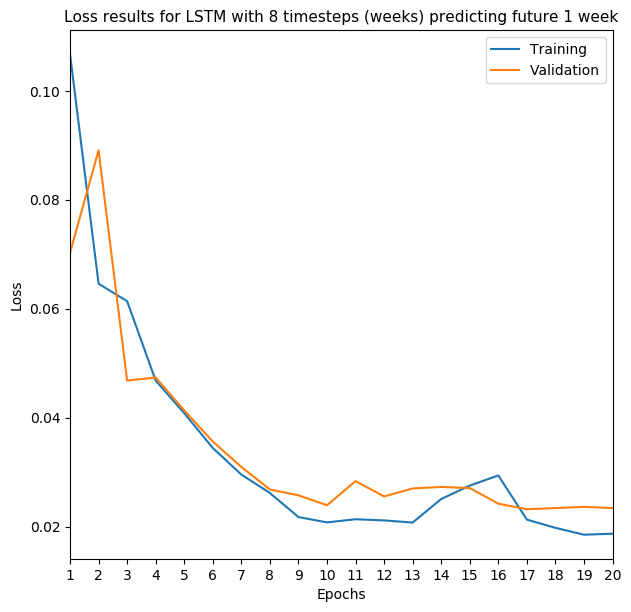

In [11]:
plt.figure(1, figsize=(7, 7), dpi=100)
plt.style.use(['default'])
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['loss'], label='Training')
plt.plot(np.arange(1,NUM_EPOCHS+1,1), history.history['val_loss'], label='Validation')
plt.xticks(np.arange(1, NUM_EPOCHS+1, 1, dtype=int))
plt.xlim(1, NUM_EPOCHS)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss results for LSTM with 8 timesteps (weeks) predicting future 1 week', fontsize=11)
plt.legend()
plt.show()

In [12]:
print('train loss history:', history.history["loss"])
print('test loss history:', history.history["val_loss"])
scores = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=1)
print('\nTest result loss: %.3f' % (scores))

train loss history: [0.10673742772390445, 0.06459922747065623, 0.06138654767225186, 0.04680050117895007, 0.04082410565267006, 0.034429499258597694, 0.02954526028285424, 0.026162962506835658, 0.021743427962064743, 0.020762113543848198, 0.021346756257116795, 0.021128448580081265, 0.020730586412052315, 0.025056797700623672, 0.02752300181115667, 0.029383365530520678, 0.021274402737617493, 0.019762790917108457, 0.018504806483785313, 0.01868593692779541]
test loss history: [0.07027249336242676, 0.08909556418657302, 0.04680944532155991, 0.04736180230975151, 0.04132309779524803, 0.03560914136469364, 0.03095017746090889, 0.02679835371673107, 0.025740370526909827, 0.023907650634646414, 0.028342146798968314, 0.025533804297447206, 0.026990491524338724, 0.027274927869439126, 0.027066193148493768, 0.024202100932598114, 0.023190006613731384, 0.023385851085186003, 0.02362380065023899, 0.02339262142777443]
30/30 [==============================] - 0s 334us/step

Test result loss: 0.019


In [13]:
y_train = model.predict(x_train, batch_size=BATCH_SIZE)
y_val = model.predict(x_val, batch_size=BATCH_SIZE)
y_pred = model.predict(x_test, batch_size=BATCH_SIZE)

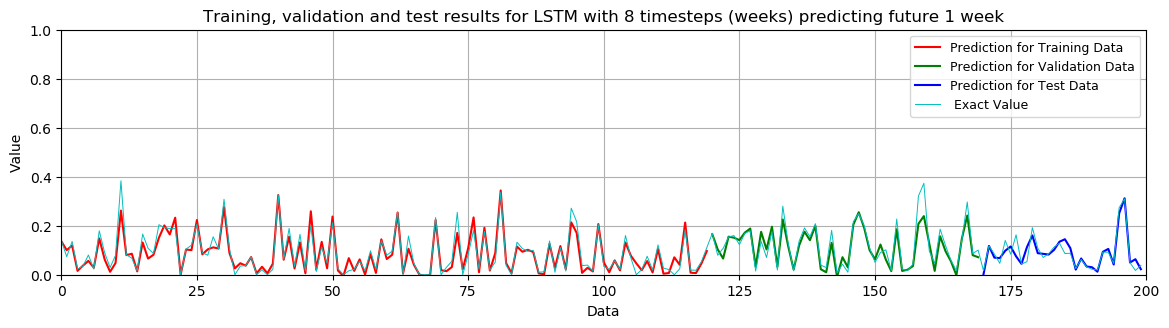

In [14]:
plt.figure(2, figsize=(14, 7), dpi=100)
plt.style.use(['default'])
plt.subplot(211)
plt.plot(range(0, TRAIN_SIZE), y_train, c='r', linewidth=1.5, label='Prediction for Training Data')
plt.plot(range(TRAIN_SIZE, TRAIN_SIZE+VAL_SIZE), y_val, c='g', linewidth=1.5, label='Prediction for Validation Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, c='b', linewidth=1.5, label='Prediction for Test Data')
plt.plot(range(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total, c='c', linewidth=0.7, label=' Exact Value')
plt.xlim(0, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Training, validation and test results for LSTM with 8 timesteps (weeks) predicting future 1 week')
plt.legend(loc='best', fontsize=9)
plt.grid(True)
plt.show()

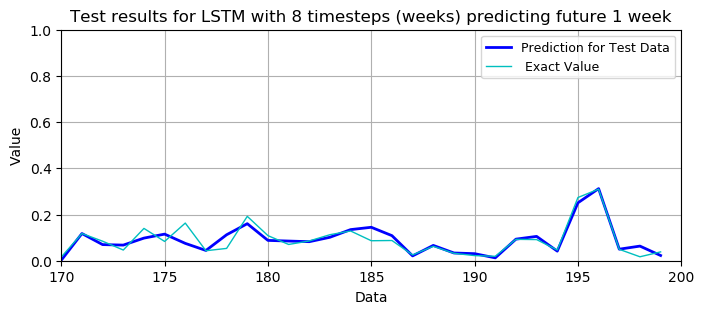

In [15]:
plt.figure(3, figsize=(8, 3), dpi=100)
plt.style.use(['default'])
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_pred, 'b', linewidth=2, label='Prediction for Test Data')
plt.plot(range(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE), y_total[TRAIN_SIZE+VAL_SIZE:TRAIN_SIZE+VAL_SIZE+TEST_SIZE], c='c', linewidth=1, label=' Exact Value')
plt.xlim(TRAIN_SIZE+VAL_SIZE, TRAIN_SIZE+VAL_SIZE+TEST_SIZE)
plt.ylim(0, 1)
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Test results for LSTM with 8 timesteps (weeks) predicting future 1 week')
plt.grid(True)
plt.legend(loc='best', fontsize=9)
plt.show()